# laptop Pricing: Cleaning Data in Python

This dataset is a collection of features related to various laptops, such as brand, processor type, RAM, storage capacity and other specifications. The dataset also includes the corresponding prices of these laptops. This dataset can be used for regression analysis to predict the prices of laptops based on their features.

Project Goal: Cleaning  the dataset

## 1. Download Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot


## 2. Import Dataset

In [11]:
df = pd.read_csv('laptop_pricing_dataset.csv')


In [12]:
#display the first five rows of the data
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [13]:
# update the Screen_size_cm column such that all values are rounded to nearest 2 decimal places:
df['Screen_Size_cm'] = np.round(df['Screen_Size_cm'],2)

In [14]:
#check the result
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


## 3. Identify and handle missing value


In [17]:
# Evaluate for Missing Data:
missing_data = df.isnull().sum()
missing_data

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

**conclusion:** <br>
Based on the summary above, each column has 238 rows of data and two of the columns containing missing data

"Weight_kg":5 missing data  "Screen_Size_cm:" 4 missing data

In [26]:
# calculate the mean value of the "Weight_kg" columns:
avg_weight = df['Weight_kg'].astype('float').mean(axis = 0)
avg_weight = np.round(avg_weight,2)
print(avg_weight)


1.86


In [27]:
# Replace "Nan" with mean value in "Weight kg" column:
df['Weight_kg'].replace(np.nan,avg_weight, inplace=True)

In [28]:
# calculate the most common value in the "Screen_Size_cm" columns:
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()


In [29]:
# calculate the missing 'Screen_Size_cm' values by the most frequent:
df['Screen_Size_cm'].replace(np.nan, common_screen_size, inplace = True)

## 4. correct data format

In [30]:
# list of data type of each columns
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [32]:
# Convert data types to proper format:
df[['Screen_Size_cm','Weight_kg']] = df[['Screen_Size_cm','Weight_kg']].astype('float')


In [33]:
# check the result:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

## 5. Data Standardisation


In [34]:
# Transform 'cm' to 'inch'  in column 'Screen_Size_cm" (1 inch = 2.54 cm)

df['Screen_Size_cm'] = df['Screen_Size_cm']/2.54

In [35]:
# Rename the columns
df.rename(columns = {'Screen_Size_cm': 'Screen_Size_inch'}, inplace = True)

In [36]:
# Transform 'kg' to 'pounds' in columns "Weight kg" (1 kg = 2.205 pounds):
df['Weight_kg'] = df['Weight_kg']*2.205

In [37]:
# Rename the columns
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace = True)

In [55]:
# Update the "Screen_Size_cm" and "Weight_pounds" columns such that all values are rounded to nearest 2 decimal places 
screen_size = np.round(df[' Screen_Size_inch'],2)
weight = np.round(df['Weight_pounds'],2)

df['Screen_Size_inch'] = screen_size
df['Weight_pounds'] = weight

In [57]:
# Check the transformed data
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen_Size_inch
0,0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,3.53,978,14.0
1,1,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,4.85,634,15.6
2,2,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,4.85,946,15.6
3,3,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,2.69,1244,13.3
4,4,HP,4,Full HD,2,1,7,15.6,1.8,8,256,4.21,837,15.6


## 6. Data Normalisation


In [59]:
# Scale the column "CPU_frequency"
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [60]:
# Update the CPU_frequency columns such that all values are rounded to nearest 2 decimal places:
df[['CPU_frequency']] = np.round(df[['CPU_frequency']],2)

In [61]:
# check the normalised colums:
df[['CPU_frequency']].head()

,CPU_frequency
0,0.55
1,0.69
2,0.93
3,0.55
4,0.62


## 7. Binning


Text(0.5, 1.0, 'Price')

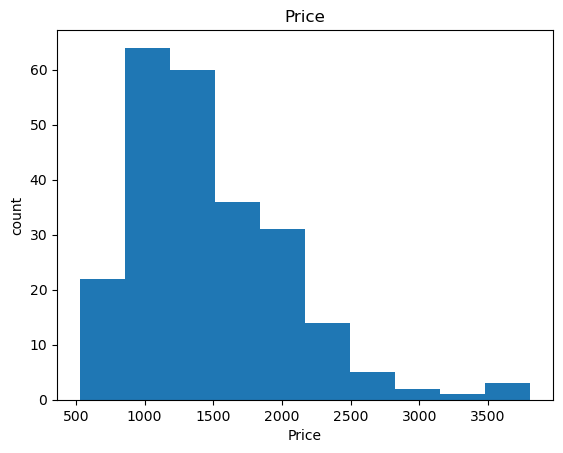

In [65]:
# Plot the histgram of "Price" Column to see what the  distribution looks like:
plt.hist(df['Price'])
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price")


In [67]:
# Rearrange the values into three 'bins':
bins = np.linspace(min(df['Price']),max(df['Price']), 4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [68]:
# Set group names
group_names =  ['Low','Medium','High']


In [69]:
# Determines what each value of df['price'] belongs to:
df['Price-binned'] = pd.cut(df['Price'], bins, labels = group_names, include_lowest=True)

In [70]:
# Check the result
df[['Price','Price-binned']].head(5)

,Price,Price-binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low


In [71]:
# check the number of values in each bin:
df['Price-binned'].value_counts()


Price-binned
Low       160
Medium     72
High        6
Name: count, dtype: int64

**Plot the bar graph of these bins**

Text(0.5, 1.0, 'Price bins')

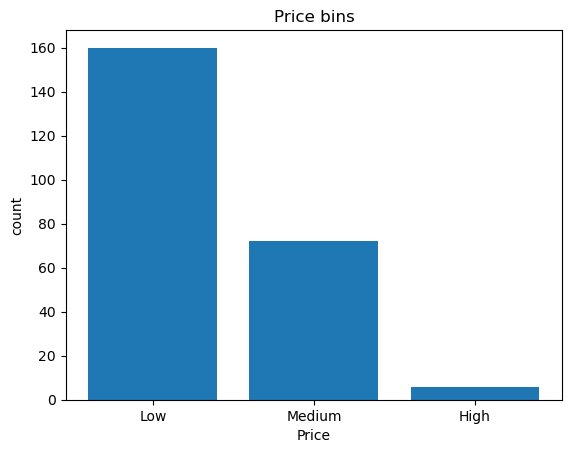

In [82]:
# Plot the distribution of each bin:

pyplot.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

## 8. Indicator variables

In [85]:
# Convert "Screen" to indicator variables and assign it to data "Dummy_variable_1"
Dummy_variable_1 = pd.get_dummies(df['Screen'])
Dummy_variable_1

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False
...,...,...
233,False,True
234,True,False
235,False,True
236,True,False


In [86]:
# change the columns  names of 'Full HD' 'IPS Panel'
Dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel','Full HD':'Screen-Full_HD'}, inplace = True)

In [87]:
# Check the result
Dummy_variable_1.head()

,Screen-Full_HD,Screen-IPS_panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [90]:
# Merge the data "df"  and " dummy_variable_1"
df = pd.concat([df,Dummy_variable_1],axis = 1)

In [91]:
# Drop original column "Screen" from df
df.drop("Screen",axis = 1, inplace = True)

In [94]:
# check the result
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen_Size_inch,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.0,0.55,8,256,3.53,978,14.0,Low,False,True
1,1,Dell,3,1,1,3,15.6,0.69,4,256,4.85,634,15.6,Low,True,False
2,2,Dell,3,1,1,7,15.6,0.93,8,256,4.85,946,15.6,Low,True,False
3,3,Dell,4,2,1,5,13.3,0.55,8,128,2.69,1244,13.3,Low,False,True
4,4,HP,4,2,1,7,15.6,0.62,8,256,4.21,837,15.6,Low,True,False


In [95]:
# Save the file
df.to_csv('laptop_price_cleaned.csv')